<a href="https://colab.research.google.com/github/plance17/Aprendizaje-de-Maquina/blob/master/Teor%C3%ADa_4_Ejercicio_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import scipy
import math
import pandas as pd 
from scipy import linalg, optimize
from sympy.solvers import solve
from sympy import Symbol

from sklearn import neighbors
from sklearn import metrics
from sklearn import svm
import sklearn

import array as arr
# realizar solicitudes web desde una URL
import requests

import urllib.request 

# xlrd nos ayuda a extraer datos de hojas de cálculo de Excel (.xls y .xlsx)
# https://xlrd.readthedocs.io/en/latest/
from xlrd import open_workbook

In [3]:
cancer_tissues = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBCD/data/data.csv")
cancer_tissues.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
print(cancer_tissues.columns)
print(cancer_tissues.columns.size)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
33


Creo una matriz donde los cánceres malignos se representan con 0 y los cánceres benignos con 1.

In [5]:
cancer_type=np.zeros(cancer_tissues.diagnosis.size)
for i in np.arange(0,cancer_tissues.diagnosis.size):
  if cancer_tissues.diagnosis[i]=='M':
    cancer_type[i]=0
  if cancer_tissues.diagnosis[i]=='B':
    cancer_type[i]=1

print(cancer_type)
print(cancer_type.size)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0.

In [5]:
#Tomo un 80% del dataset como entrenamiento, y un 20% para testear
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(cancer_tissues.iloc[:,2:31], cancer_type, test_size=0.2, random_state=1)

In [6]:
# Clasifico utilizando Support Vector Machine
classifier = svm.SVC(gamma=0.001)
# Entreno el clasificador
classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
# Ahora testeo 
y_predicted = classifier.predict(x_test)

Confusion matrix:
[[40  2]
 [ 3 69]]

Sensibilidad: 0.9302325581395349
Presicion: 0.9523809523809523
Exactitud: 0.956140350877193
Fall_out: 0.028169014084507043


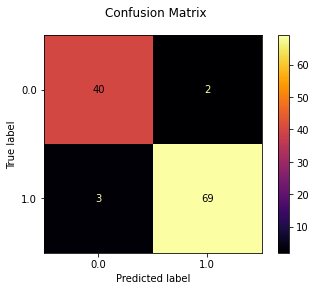

In [8]:
disp = metrics.plot_confusion_matrix(classifier, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

#True Positive Rate
sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

#Positive Predicted Value
presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

#Accuracy
exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

#False Positive Rate
fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])
print('')
print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)

El programa ubica los datos que corresponden a cánceres malignos en la fila superior de la matriz de confusión. Los cánceres malignos serían considerados como positivos.

El clasificador con las condiciones dadas es muy bueno.

**Varío el gamma para ver como cambian las predicciones**

Confusion matrix:
[[ 0 42]
 [ 0 72]]

Sensibilidad: nan
Presicion: 0.0
Exactitud: 0.631578947368421
Fall_out: 0.3684210526315789


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  


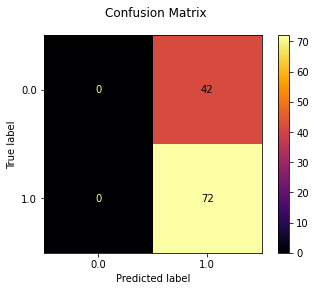

In [10]:
#Tomo un 80% del dataset como entrenamiento, y un 20% para testear
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(cancer_tissues.iloc[:,2:31], cancer_type, test_size=0.2, random_state=1)

classifier = svm.SVC(gamma=0.01)
classifier.fit(x_train, y_train)

y_predicted = classifier.predict(x_test)

disp = metrics.plot_confusion_matrix(classifier, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

#True Positive Rate
sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

#Positive Predicted Value
presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

#Accuracy
exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

#False Positive Rate
fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])
print('')
print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)

Confusion matrix:
[[ 0 42]
 [ 0 72]]

Sensibilidad: nan
Presicion: 0.0
Exactitud: 0.631578947368421
Fall_out: 0.3684210526315789


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  


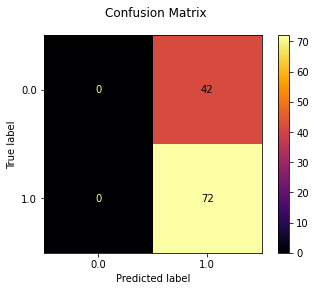

In [11]:
#Tomo un 80% del dataset como entrenamiento, y un 20% para testear
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(cancer_tissues.iloc[:,2:31], cancer_type, test_size=0.2, random_state=1)

classifier = svm.SVC(gamma=0.1)
classifier.fit(x_train, y_train)

y_predicted = classifier.predict(x_test)

disp = metrics.plot_confusion_matrix(classifier, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

#True Positive Rate
sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

#Positive Predicted Value
presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

#Accuracy
exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

#False Positive Rate
fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])
print('')
print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)

Confusion matrix:
[[ 0 42]
 [ 0 72]]

Sensibilidad: nan
Presicion: 0.0
Exactitud: 0.631578947368421
Fall_out: 0.3684210526315789


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  


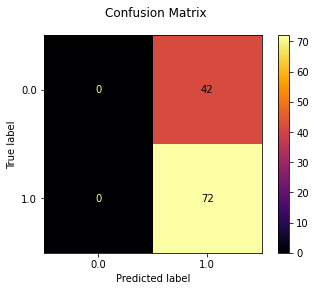

In [12]:
#Tomo un 80% del dataset como entrenamiento, y un 20% para testear
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(cancer_tissues.iloc[:,2:31], cancer_type, test_size=0.2, random_state=1)

classifier = svm.SVC(gamma=1)
classifier.fit(x_train, y_train)

y_predicted = classifier.predict(x_test)

disp = metrics.plot_confusion_matrix(classifier, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

#True Positive Rate
sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

#Positive Predicted Value
presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

#Accuracy
exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

#False Positive Rate
fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])
print('')
print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)

Confusion matrix:
[[36  6]
 [ 1 71]]

Sensibilidad: 0.972972972972973
Presicion: 0.8571428571428571
Exactitud: 0.9385964912280702
Fall_out: 0.07792207792207792


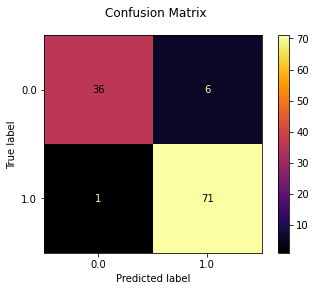

In [13]:
#Tomo un 80% del dataset como entrenamiento, y un 20% para testear
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(cancer_tissues.iloc[:,2:31], cancer_type, test_size=0.2, random_state=1)

classifier = svm.SVC(gamma=0.0001)
classifier.fit(x_train, y_train)

y_predicted = classifier.predict(x_test)

disp = metrics.plot_confusion_matrix(classifier, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

#True Positive Rate
sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

#Positive Predicted Value
presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

#Accuracy
exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

#False Positive Rate
fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])
print('')
print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)

Confusion matrix:
[[32 10]
 [ 2 70]]

Sensibilidad: 0.9411764705882353
Presicion: 0.7619047619047619
Exactitud: 0.8947368421052632
Fall_out: 0.125


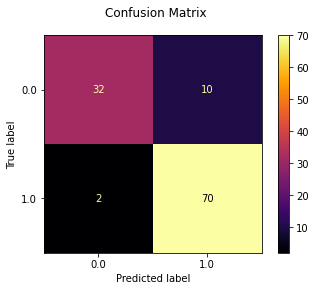

In [14]:
#Tomo un 80% del dataset como entrenamiento, y un 20% para testear
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(cancer_tissues.iloc[:,2:31], cancer_type, test_size=0.2, random_state=1)

classifier = svm.SVC(gamma=0.00001)
classifier.fit(x_train, y_train)

y_predicted = classifier.predict(x_test)

disp = metrics.plot_confusion_matrix(classifier, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

#True Positive Rate
sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

#Positive Predicted Value
presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

#Accuracy
exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

#False Positive Rate
fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])
print('')
print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)

Confusion matrix:
[[31 11]
 [ 0 72]]

Sensibilidad: 1.0
Presicion: 0.7380952380952381
Exactitud: 0.9035087719298246
Fall_out: 0.13253012048192772


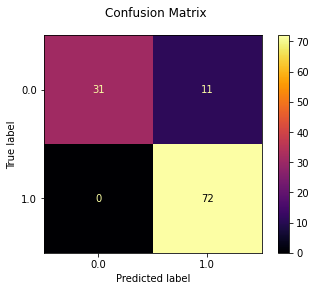

In [15]:
#Tomo un 80% del dataset como entrenamiento, y un 20% para testear
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(cancer_tissues.iloc[:,2:31], cancer_type, test_size=0.2, random_state=1)

classifier = svm.SVC(gamma=0.000001)
classifier.fit(x_train, y_train)

y_predicted = classifier.predict(x_test)

disp = metrics.plot_confusion_matrix(classifier, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

#True Positive Rate
sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

#Positive Predicted Value
presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

#Accuracy
exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

#False Positive Rate
fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])
print('')
print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)

Valores óptimos para gamma parecen ser entre 0.001 y 0.0001. Es cuando se obtienen mejores resultados.

Con valores mayores a 0.001 me clasifica todos los cánceres como benignos, es un clasificador espantoso.

**Mantengo gamma y varío el tamaño del dataset de entrenamiento y testeo**

Confusion matrix:
[[ 60   3]
 [  6 102]]

Sensibilidad: 0.9090909090909091
Presicion: 0.9523809523809523
Exactitud: 0.9473684210526315
Fall_out: 0.02857142857142857


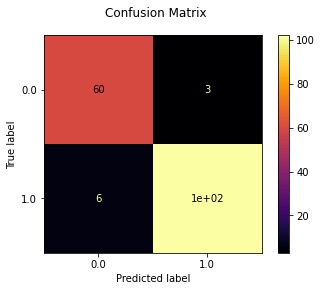

In [16]:
#Tomo un 70% del dataset como entrenamiento, y un 30% para testear
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(cancer_tissues.iloc[:,2:31], cancer_type, test_size=0.3, random_state=1)

classifier = svm.SVC(gamma=0.001)
classifier.fit(x_train, y_train)

y_predicted = classifier.predict(x_test)

disp = metrics.plot_confusion_matrix(classifier, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

#True Positive Rate
sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

#Positive Predicted Value
presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

#Accuracy
exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

#False Positive Rate
fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])
print('')
print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)

Confusion matrix:
[[ 74   6]
 [ 13 135]]

Sensibilidad: 0.8505747126436781
Presicion: 0.925
Exactitud: 0.9166666666666666
Fall_out: 0.0425531914893617


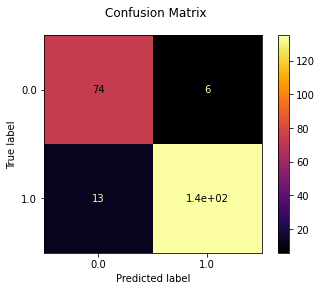

In [17]:
#Tomo un 60% del dataset como entrenamiento, y un 40% para testear
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(cancer_tissues.iloc[:,2:31], cancer_type, test_size=0.4, random_state=1)

classifier = svm.SVC(gamma=0.001)
classifier.fit(x_train, y_train)

y_predicted = classifier.predict(x_test)

disp = metrics.plot_confusion_matrix(classifier, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

#True Positive Rate
sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

#Positive Predicted Value
presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

#Accuracy
exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

#False Positive Rate
fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])
print('')
print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)

Al caso de 60% del dtaset como entrenamiento y 40% como testeo le varío el gamma a 0.0001

Confusion matrix:
[[ 73   7]
 [  7 141]]

Sensibilidad: 0.9125
Presicion: 0.9125
Exactitud: 0.9385964912280702
Fall_out: 0.0472972972972973


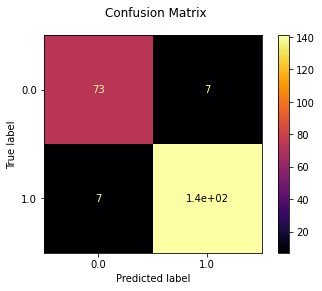

In [18]:
#Tomo un 60% del dataset como entrenamiento, y un 40% para testear
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(cancer_tissues.iloc[:,2:31], cancer_type, test_size=0.4, random_state=1)

classifier = svm.SVC(gamma=0.0001)
classifier.fit(x_train, y_train)

y_predicted = classifier.predict(x_test)

disp = metrics.plot_confusion_matrix(classifier, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

#True Positive Rate
sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

#Positive Predicted Value
presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

#Accuracy
exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

#False Positive Rate
fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])
print('')
print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)

Confusion matrix:
[[ 74   6]
 [ 11 137]]

Sensibilidad: 0.8705882352941177
Presicion: 0.925
Exactitud: 0.9254385964912281
Fall_out: 0.04195804195804196


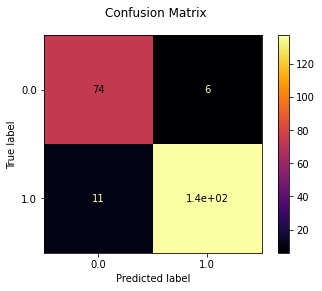

In [19]:
#Tomo un 50% del dataset como entrenamiento, y un 50% para testear
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(cancer_tissues.iloc[:,2:31], cancer_type, test_size=0.4, random_state=1)

classifier = svm.SVC(gamma=0.0005)
classifier.fit(x_train, y_train)

y_predicted = classifier.predict(x_test)

disp = metrics.plot_confusion_matrix(classifier, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

#True Positive Rate
sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

#Positive Predicted Value
presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

#Accuracy
exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

#False Positive Rate
fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])
print('')
print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)

Confusion matrix:
[[ 91  12]
 [ 21 161]]

Sensibilidad: 0.8125
Presicion: 0.883495145631068
Exactitud: 0.8842105263157894
Fall_out: 0.06936416184971098


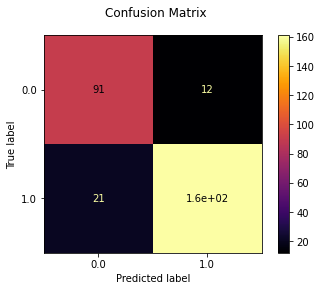

In [20]:
#Tomo un 50% del dataset como entrenamiento, y un 50% para testear
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(cancer_tissues.iloc[:,2:31], cancer_type, test_size=0.5, random_state=1)

classifier = svm.SVC(gamma=0.001)
classifier.fit(x_train, y_train)

y_predicted = classifier.predict(x_test)

disp = metrics.plot_confusion_matrix(classifier, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

#True Positive Rate
sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

#Positive Predicted Value
presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

#Accuracy
exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

#False Positive Rate
fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])
print('')
print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)

A este último caso, le varío el gamma, para ver si mejora un poco.

Confusion matrix:
[[ 88  15]
 [  6 176]]

Sensibilidad: 0.9361702127659575
Presicion: 0.8543689320388349
Exactitud: 0.9263157894736842
Fall_out: 0.07853403141361257


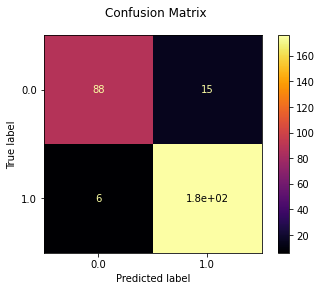

In [21]:
#Tomo un 50% del dataset como entrenamiento, y un 50% para testear
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(cancer_tissues.iloc[:,2:31], cancer_type, test_size=0.5, random_state=1)

classifier = svm.SVC(gamma=0.0001)
classifier.fit(x_train, y_train)

y_predicted = classifier.predict(x_test)

disp = metrics.plot_confusion_matrix(classifier, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

#True Positive Rate
sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

#Positive Predicted Value
presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

#Accuracy
exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

#False Positive Rate
fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])
print('')
print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)

Para las últimas pruebas, donde se cambió gamma de 0.001 a 0.0001 para los casos de clasificación con un dataset de entrenamiento del 60% del dataset total, la sensibilidad y la exactitud se ven mejorada, y la precision dismuniye un poco. Pareciera que el parámetro mas óptimo de gamma sería 0.0001.

Y probado para el caso de dataset de entrenamiento del 60%, un valor intermedio entre 0.001 y 0.0001 parece obtener buenos resultados de presición, exactitud y sensibilidad.

Confusion matrix:
[[36  6]
 [ 1 71]]

Sensibilidad: 0.972972972972973
Presicion: 0.8571428571428571
Exactitud: 0.9385964912280702
Fall_out: 0.07792207792207792


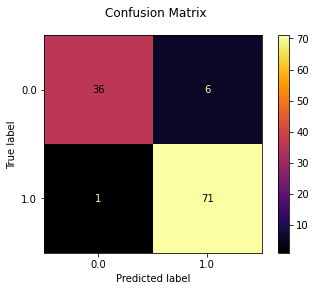

In [22]:
#Tomo un 80% del dataset como entrenamiento, y un 20% para testear
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(cancer_tissues.iloc[:,2:31], cancer_type, test_size=0.2, random_state=1)

classifier = svm.SVC(gamma=0.0001)
classifier.fit(x_train, y_train)

y_predicted = classifier.predict(x_test)

disp = metrics.plot_confusion_matrix(classifier, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

#True Positive Rate
sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

#Positive Predicted Value
presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

#Accuracy
exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

#False Positive Rate
fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])
print('')
print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)

Para el caso de un dataset de entrenamiento que es el 80% del dataset completo, la variación de sigma parece no afectar considerablemente con las predicciones.

**k-vecinos mas cercanos**

Confusion matrix:
[[36  6]
 [ 1 71]]

Sensibilidad: 0.972972972972973
Presicion: 0.8571428571428571
Exactitud: 0.9385964912280702
Fall_out: 0.07792207792207792


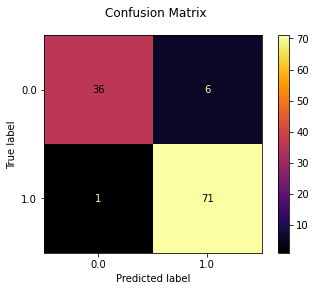

In [23]:
#Tomo un 80% del dataset como entrenamiento, y un 20% para testear
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(cancer_tissues.iloc[:,2:31], cancer_type, test_size=0.2, random_state=1)

#Número de vecinos mas cercanos y entrenamiento del sistema
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

y_predicted = classifier.predict(x_test)

disp = metrics.plot_confusion_matrix(classifier, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

#True Positive Rate
sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

#Positive Predicted Value
presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

#Accuracy
exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

#False Positive Rate
fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])
print('')
print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)

Confusion matrix:
[[ 56   7]
 [  3 105]]

Sensibilidad: 0.9491525423728814
Presicion: 0.8888888888888888
Exactitud: 0.9415204678362573
Fall_out: 0.0625


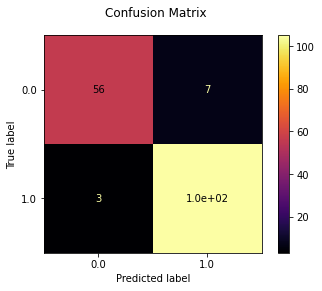

In [24]:
#Tomo un 70% del dataset como entrenamiento, y un 30% para testear
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(cancer_tissues.iloc[:,2:31], cancer_type, test_size=0.3, random_state=1)

#Número de vecinos mas cercanos y entrenamiento del sistema
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

y_predicted = classifier.predict(x_test)

disp = metrics.plot_confusion_matrix(classifier, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

#True Positive Rate
sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

#Positive Predicted Value
presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

#Accuracy
exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

#False Positive Rate
fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])
print('')
print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)

Confusion matrix:
[[ 71   9]
 [  3 145]]

Sensibilidad: 0.9594594594594594
Presicion: 0.8875
Exactitud: 0.9473684210526315
Fall_out: 0.05844155844155844


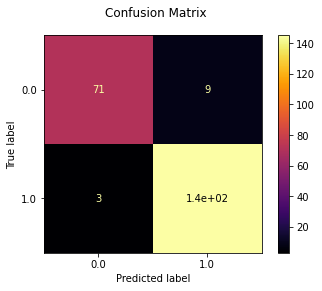

In [25]:
#Tomo un 60% del dataset como entrenamiento, y un 40% para testear
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(cancer_tissues.iloc[:,2:31], cancer_type, test_size=0.4, random_state=1)

#Número de vecinos mas cercanos y entrenamiento del sistema
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

y_predicted = classifier.predict(x_test)

disp = metrics.plot_confusion_matrix(classifier, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

#True Positive Rate
sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

#Positive Predicted Value
presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

#Accuracy
exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

#False Positive Rate
fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])
print('')
print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)

Para k vecinos mas cercanos, el variar el tamaño del dataset de entrenamiento no afecta de manera considerable la exactitud, sensibilidad y presición.

Confusion matrix:
[[ 71   9]
 [  3 145]]

Sensibilidad: 0.9594594594594594
Presicion: 0.8875
Exactitud: 0.9473684210526315
Fall_out: 0.05844155844155844


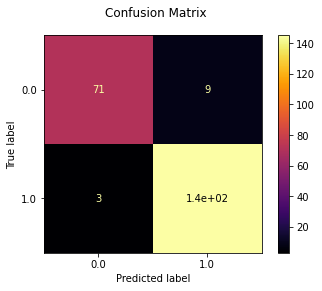

In [27]:
#Tomo un 60% del dataset como entrenamiento, y un 40% para testear
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(cancer_tissues.iloc[:,2:31], cancer_type, test_size=0.4, random_state=1)

#Número de vecinos mas cercanos y entrenamiento del sistema
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

y_predicted = classifier.predict(x_test)

disp = metrics.plot_confusion_matrix(classifier, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

#True Positive Rate
sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

#Positive Predicted Value
presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

#Accuracy
exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

#False Positive Rate
fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])
print('')
print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)

El aumentar el valor de k de vecinos mas cercanos no mejora la clasificación. Las clasificaciones son muy buenas en todos los casos.

**Pruebas de varibles individuales**

In [8]:
cancer_type_dataframe = pd.DataFrame(cancer_type,columns= ['Cancer_type'])
print(cancer_type_dataframe)

     Cancer_type
0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
..           ...
564          0.0
565          0.0
566          0.0
567          0.0
568          1.0

[569 rows x 1 columns]


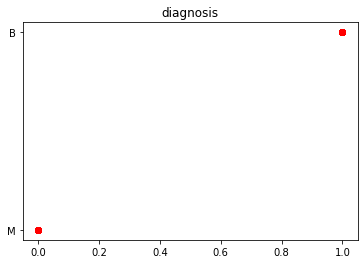

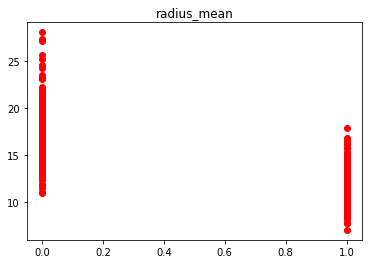

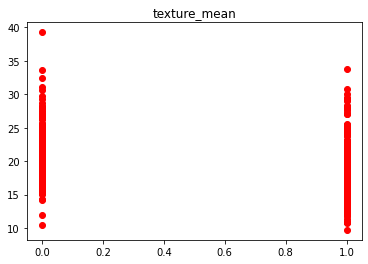

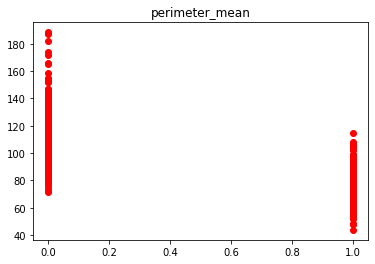

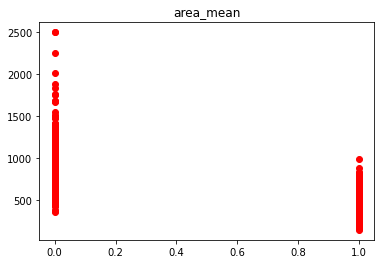

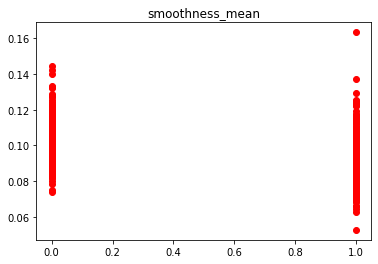

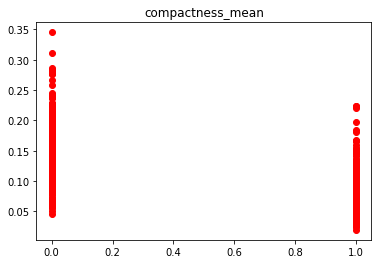

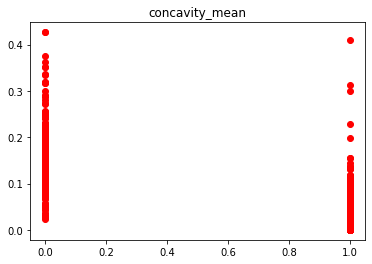

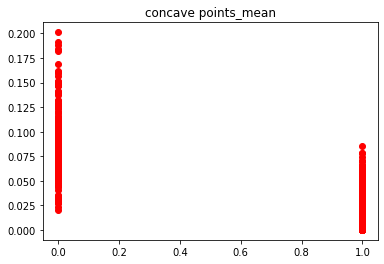

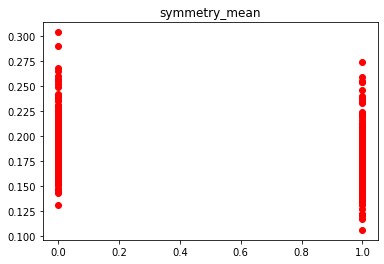

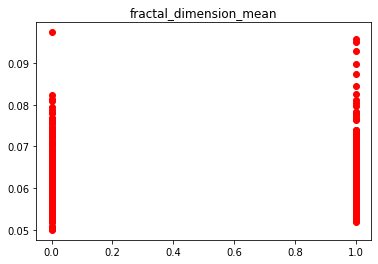

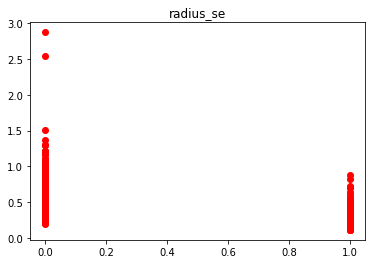

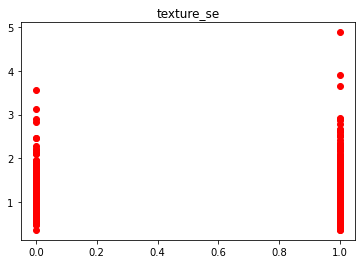

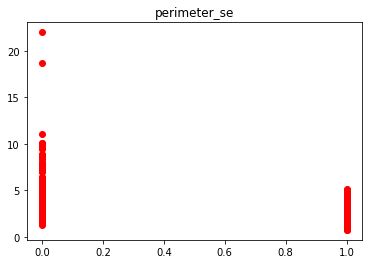

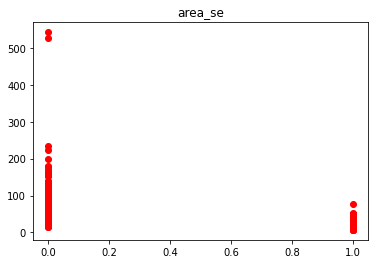

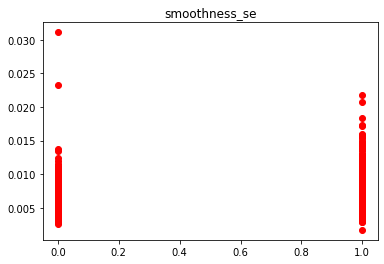

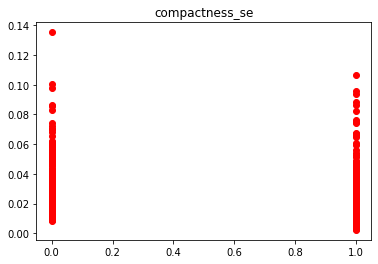

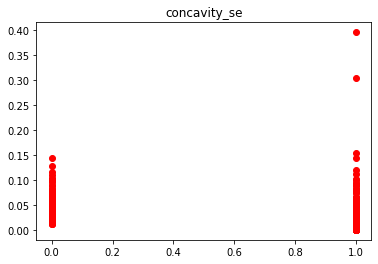

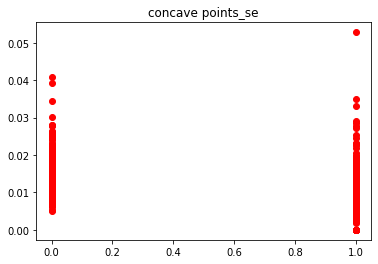

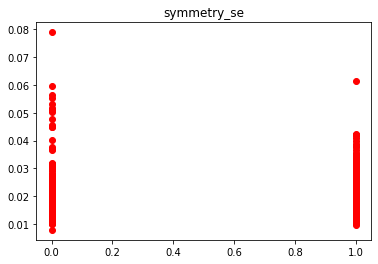

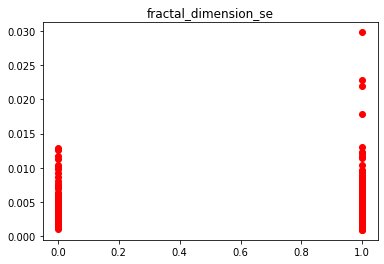

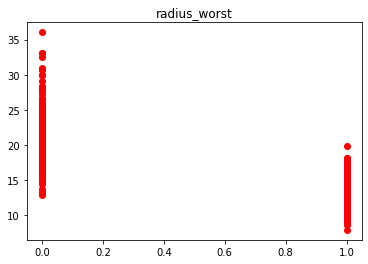

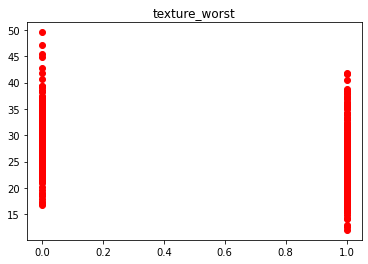

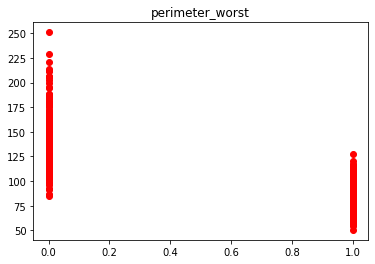

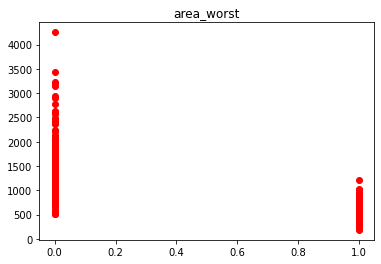

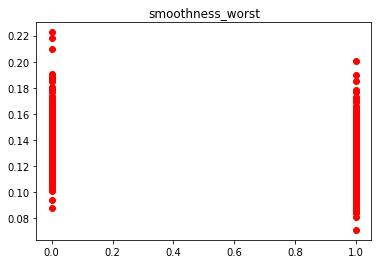

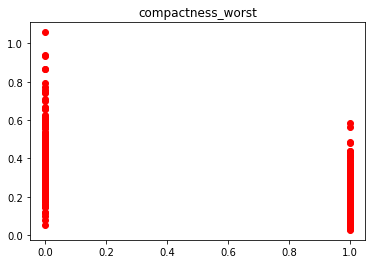

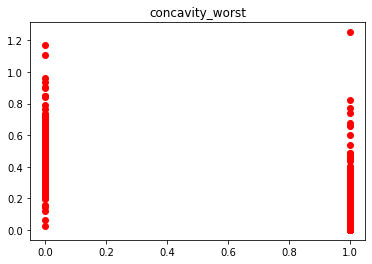

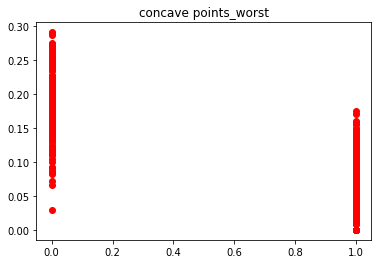

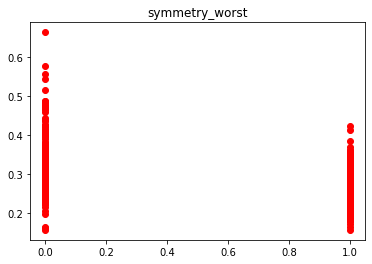

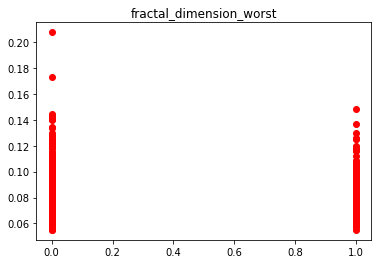

In [12]:
#fig, axs = plt.subplots(1, cancer_tissues.columns.size-2)  #El -2 es porque no voy a considerar las columnas de ID y de Unnamed

for i in np.arange(1,cancer_tissues.columns.size-1):
  plt.plot(cancer_type_dataframe, cancer_tissues.iloc[:,i], 'ro')
  plt.title(cancer_tissues.columns[i])
  plt.show()

  '''
  axs[0, 1].plot(x, y, 'tab:orange')
  axs[0, 1].set_title('Axis [0,1]')
  axs[1, 0].plot(x, -y, 'tab:green')
  axs[1, 0].set_title('Axis [1,0]')
  axs[1, 1].plot(x, -y, 'tab:red')
  axs[1, 1].set_title('Axis [1,1]')
  '''


Recordar que cancer maligno se clasifica como 0 y el benigno como 1

El "radius_mean"(radio medio) parece ser un buen parámetro para clasificar, en el gráfico se observa que hay un valor umbral. Por encima de este valor, el cáncer que se detecte correspondería a un cáncer maligno.

El parámetro "texture_mean"(textura meadi) no parece ser un buen parámetro, se observa que puede ser mayor para un cáncer maligno, pero no hay una diferencia muy marcada.

El parámetro "perimeter_mean"(parámetro medio) es útil para la clasificación, los cánceres malignos suelen corresponder a un perímetro promedio mayor que los benignos, y por encima de un dado umbral el cáncer será siempre maligno.

Lo mismo que para "perimeter_mean" sucede para el "area_mean"(área promedio), y la diferencia es mas marcada, con lo cual se podría considerar que la forma de los cánceres malignos y benignos pueden ser muy parecidos, por eso un aumento del perímetro correspondería a un aumento del área.

El parámetro "smoothness_mean" no es muy útil para un clasificador, los datos del cáncer maligno presentran menor dispersión de los del cáncer benigno, pero el valor medio es muy similar en ambos casos. 

El parámetro "compactness_mean"(que tan compacto es) muestra una diferencia entre cánceres malignos y benignos, y da un umbral sobre el cuál los cánceres son malignos.

El parámetro "concavity_mean"(concavidad media) posee una media mayor para cánceres malignos que benignos, y a valores altos de este parámetro es mas probable que el cáncer sea maligno, aunque puede haber casos aislados de cánceres benignos.

El parámetro "concavate points_mean" es un parámetro muy útil para la clasificación, demuestra un marcado umbral sobre el cual el cáncer será maligno.

El parámetro "symetry_mean"(simetría media) no parece ser un buen parámetro de clasificiación, presenta valores similares para ambos tipos de cánceres.

Para el parámetro "fractal dimension_mean"(dimensión fractal media) los cánceres benignos presentan un mayor valor medio de la distribución, y valores altos son mas probables para cánceres benignos, pero pueden igual corresponder a cánceres malignos.

El parámetro "radius_se" y "radius_worst" presenta una menor distribución para cánceres benignos, y a partir de un umbral, todos los cánceres son malignos.

El parámetro "texture_se" y "texture_worst" es similar para ambos cánceres.

El parámetro "perimeter_se" y "perimeter_worst" a partir de un valor umbral(diferente para cada perímetro) corresponde a cánceres malignos. Es buen parámetro para un clasificar. Y lo mismo sucede para los parámetros "area_se" y "area_worst".

Los parámetros "smoothness_se", "compactness_se" y "smoothness_worst" presentan valores similares para ambos tipos de cánceres, y solo presentan muy pocos valores "atípicos" que podrían ayudar a diferenciar, pero no son suficientes.

Los parámetros "concavity_se", "concavity point_se" y "concavity_worst" presentan algunos valores aislados que corresponderían a un cáncer u otro, pero en su mayor distribución son iguales.   

El parámetro "symetry_es" presenta valores mayores en la distribución para cánceres malignos, aunque pueden presentarse casos de cánceres benignos con esos valores.

El parámetro "fractal dimension_es" posee un umbral sobre el cual los cánceres se clasifican como benignos, aunque los cánceres que presentan valores superiores al umbral de dimensión fractal son pocos.

El parámetro "compactness_worst" presenta un valor umbral sobre el cual los cánceres son todos malignos, con lo cual podría utilizarse como clasificador.

Los parámetros "concave point_worst" y "symetry_worst" puede utilizarse como clasificador, posee un umbral sobre el cual los cánceres son malignos.

El parámetro "fractal dimension_worst" no es muy útil para la clasificación, presenta valores mayores para cánceres malignos en algunos casos, pero estos casos son muy aislados.

In [19]:
print(cancer_tissues.columns)
print(cancer_tissues.columns[0])
print(cancer_tissues.iloc[:,1])

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
id
0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


In [36]:
parameters=np.zeros((cancer_tissues.diagnosis.size,12)) #cancer_tissues.diagnosis=cancer_tissues.iloc[:,0]
#

h=0
parameters[:,h]=cancer_type
h=h+1
for i in np.arange(0,cancer_tissues.columns.size):
  if i==2 or i==4 or i==5 or i==7 or i==12 or i==14 or i==15 or i==22 or i==24 or i==25 or i==26:
    parameters[:,h]=cancer_tissues.iloc[:,i]
    h=h+1

parameters = pd.DataFrame(parameters,columns= ['Diagnosis','radius_mean','perimeter_mean','area_mean','compactness_mean','radius_se','perimeter','area_se','radius_worst','perimeter_worst','area_worst','compactness_worst'])  
print(parameters) 

     Diagnosis  radius_mean  ...  area_worst  compactness_worst
0          0.0        17.99  ...      2019.0            0.16220
1          0.0        20.57  ...      1956.0            0.12380
2          0.0        19.69  ...      1709.0            0.14440
3          0.0        11.42  ...       567.7            0.20980
4          0.0        20.29  ...      1575.0            0.13740
..         ...          ...  ...         ...                ...
564        0.0        21.56  ...      2027.0            0.14100
565        0.0        20.13  ...      1731.0            0.11660
566        0.0        16.60  ...      1124.0            0.11390
567        0.0        20.60  ...      1821.0            0.16500
568        1.0         7.76  ...       268.6            0.08996

[569 rows x 12 columns]


Confusion matrix:
[[35  7]
 [ 1 71]]

Sensibilidad: 0.9722222222222222
Presicion: 0.8333333333333334
Exactitud: 0.9298245614035088
Fall_out: 0.08974358974358974


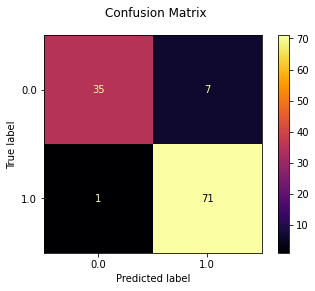

In [38]:
#Tomo un 80% del dataset como entrenamiento, y un 20% para testear
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(parameters.iloc[:,1:11], parameters.iloc[:,0], test_size=0.2, random_state=1)

classifier = svm.SVC(gamma=0.0001)
classifier.fit(x_train, y_train)

y_predicted = classifier.predict(x_test)

disp = metrics.plot_confusion_matrix(classifier, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

#True Positive Rate
sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

#Positive Predicted Value
presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

#Accuracy
exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

#False Positive Rate
fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])
print('')
print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)

Confusion matrix:
[[ 56   7]
 [  3 105]]

Sensibilidad: 0.9491525423728814
Presicion: 0.8888888888888888
Exactitud: 0.9415204678362573
Fall_out: 0.0625


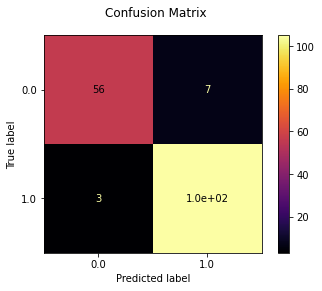

In [39]:
#Tomo un 70% del dataset como entrenamiento, y un 30% para testear
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(parameters.iloc[:,1:11], parameters.iloc[:,0], test_size=0.3, random_state=1)

classifier = svm.SVC(gamma=0.0001)
classifier.fit(x_train, y_train)

y_predicted = classifier.predict(x_test)

disp = metrics.plot_confusion_matrix(classifier, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

#True Positive Rate
sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

#Positive Predicted Value
presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

#Accuracy
exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

#False Positive Rate
fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])
print('')
print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)

Con los parámetros elegidos para la clasificiación se obtienen resultados casi iguales a la clasificación utilizando todos las características, con cual el nuevo subdataset contiene los parámetros mas relevantes para la clasificación.